<a href="https://colab.research.google.com/github/Shuraimi/fastai_DL_course/blob/main/Lesson_1_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fast.ai : Lesson 1 Introduction

This chapter introduces us to the Deep Learning and the fast.ai library. It also tells us how to learn Deep Learning, history of Deep Learning, building an Image recogniser using the fastai library and many more things.

I've noted down the following parts in each section. These points will be helpful for me to learn Deep Learning effectively.

## Myths busted

```asciidoc
[[myths]]
.What you don't need to do deep learning
[options="header"]
|======
| Myth (don't need) | Truth
| Lots of math | Just high school math is sufficient
| Lots of data | We've seen record-breaking results with <50 items of data
| Lots of expensive computers | You can get what you need for state of the art work for free
|======
```

## What to do incase you're stuck anywhere while reading the book?

There will be times when the journey will feel hard. Times where you feel stuck. Don't give up! Rewind through the book to find the last bit where you definitely weren't stuck, and then read slowly through from there to find the first thing that isn't clear. Then try some code experiments yourself, and Google around for more tutorials on whatever the issue you're stuck with is-often you'll find some different angle on the material might help it to click.

Also, it's expected and normal to not understand everything (especially the code) on first reading. Trying to understand the material serially before proceeding can sometimes be hard. Sometimes things click into place after you get more context from parts down the road, from having a bigger picture. **So if you do get stuck on a section, try moving on anyway and make a note to come back to it later.**

What you will need to do to succeed however is to apply what you learn in this book to a personal project, and always persevere.

## Your projects and your mindset

It helps to focus on your hobbies and passions-- setting yourself four or five little projects rather than striving to solve a big, grand problem
tends to work better when you're getting started. Since it is easy to get stuck, trying to be too ambitious too early can often backfire.Then, once you've got the basics mastered, aim to complete something you're really proud of!

## The software, library

However, it doesn't really matter what software

you learn, because it takes only a few days to learn to switch from one library to another. What really matters is learning the deep learning foundations and techniques properly. Our focus will be on using code that clearly expresses the concepts that you need to learn. Where we are teaching high-level concepts, we will use high-level fastai code. Where we are teaching low-level concepts, we will use low- level PyTorch, or even pure Python code.

If it feels like new deep learning libraries are appearing at a rapid pace nowadays, then you need to be prepared for a much faster rate of change in the coming months and years. As more people enter the field, they will bring more skills and ideas, and try more things. You should assume that whatever specific libraries and software you learn today will be obsolete in a year or two. **We strongly believe that the focus in learning needs to be on understanding the underlying techniques and how to apply them in practice, and how to quickly build expertise in new tools and techniques as they are released.**

It is also crucial to run your own experiments in parallel with the book.

## Recommended flow while reading the book

After reading a section of the book, we recommend working through the stripped notebooks, with the book closed, and seeing if you can figure out what each cell will show before you execute it. Also try to recall what the code is demonstrating.

There are many different architectures in fastai, which we will introduce in this book (as well as discussing how to create your own). Most of the time, however, picking an architecture isn't a very important part of the deep learning process. It's something that academics love to talk about, but in practice it is unlikely to be something you need to spend much time on. There are some standard architectures that work most of the time, and in this case we're using one called ResNet that we'll be talking a lot about during the book; it is both fast and accurate for many datasets and problems. The 34 in resnet34 refers to the number of layers in this variant of the architecture (other options are 18, 50, 101, and 152). Models using architectures with more layers take longer to train, and are more prone to overfitting (i.e. you can't train them for as many epochs before the accuracy on the validation set starts getting worse). On the other hand, when using more data, they can be quite a bit more accurate.

## What is a metric?

A metric is a function that measures the quality of the model's predictions using the validation set, and will be printed at the end of each epoch. In this case, we're using error_rate, which is a function provided by fastai that does just what it says: tells you what percentage of images in the validation set are being classified incorrectly. Another common metric for classification is accuracy (which is just 1.0 - error_rate), fastai provides many more, which will be discussed throughout this book.

The concept of a metric may remind you of loss, but there is an important distinction. The entire purpose of loss is to define a "measure of performance" that the training system can use to update weights automatically. In other words, a good choice for loss is a choice that is easy for stochastic gradient descent to use. But a metric is defined for human consumption, so a good metric is one that is easy for you to understand, and that hews as closely as possible to what you want the model to do.

## Dog vs Cat image recogniser

In this section, I'll be building a model for recognizing cats vs dogs.

I'm following the top-down approach and building a recogniser before deeply understanding each part of it.

In [ ]:
from fastai.vision.all import *
path=untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls=ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(224)
)

learn=vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 177MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.165227,0.031589,0.007442,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.069236,0.023601,0.010149,00:53


This is how we build an image recogniser using a pretrained classifier on fast.ai

### How the above Image recogniser works?



```
from fastai.vision.all import *
```
The above line of code helps to import all of the functions and classes we need to create a variety of Coputer Vision models.


The next line of code is used to download dataset.
```
path = untar_data(URLs.PETS)/'images'
```
This downloads a standard dataset from fastai datasets collection to your server, extracts it and returns a path object with extracted location.

```
def is_cat(x): return x[0].isupper()
```
The above function is used to create labels

```
dls = ImageDataLoaders.from_name_func((
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(224)
```

This line of code is explined as follows:-

The first part of classname will generally be the type of dat you have such as image or text.
<br>
Example:- Since we are using images as input, the class name starts with Image.

The other important information we have to tell fastai is how to get the labels from the dataset. Computer Vision datasets are structured in a way the label for an image is part of the filename or path.

Here we're telling fastai to use the `is_cat` fucntion we defined.

Finally we define Transformers which contains code automatically applied during training. There are 2 kinds:-
- `item_tfms` applied to each item to resize to 224px
- `batch_tfms` applied to batch of items at a time using GPU.

For example: Each image is labelled usinf its filename.
great_pyreness_173.jpg is the 173rd example of an image of Great Pyreness breed dog in the dataset.

The filenames start with an uppercase letter if it is a cat and lowercase if its a dog.

We have to tell fastai how to get labels from filenames, which we do by calling `from_name_func` (which means lanels can be extracted using a function applied to filename) and passing `is_cat` returns `x[0].isupper()` which evaluates to True if its a cat and False if its a dog.

fastai will always show us the model accuracy inly using the validation set and never the training set.

Overfitting occurs when model performs very well on the training data and does'nt generalise well on the test data. It is the single most important and challenging issue.

**Important** - When you train a model, you must always have a training set and a validation set and accuracy should be measured only on the dev set.

If you train a model for too long with not enough data, you'll notice the accuracy of your model starts to get wrose and this is called overfitting.

```
learn = vision_learner(dls,
        resnet34,
        metrics=error_rate)
```
This line of code tells fastai to create a convolutional neural netwrok (CNN) and specifies what architecture to use, what data we want to train and what metric to use.

Why CNN?
> because it is the current state-of-the-art approach to creating Computer Vision models.

`vision_learner` also has a parameter called `pretrained` which defaults to True and which sets weights in your models to values that have alreday been trained by experts to reognise 1000 different catergories across 1.3 million images.




```
learn.fine_tune(1)
```
This is the last line of code which tells fastai how to fit the model.

*Architecture* - only describes a template for a mathematical function but doesn't do anything util we provide parameters.

*Epoch* - how many times to look at each image in the dataset.




## What's a pretrained model?

A model that has weights that have already been trained on some other dataset is called a pretrained model. You should nearly always use a pretrained model, because it means that your model, before you've even shown it any of your data, is already very capable

When using a pretrained model, vision_learner will remove the last layer, since that is always specifically customized to the original training task (i.e. ImageNet dataset classification), and replace it with one or more new layers with randomized weights, of an appropriate size for the dataset you are working with. This last part of the model is known as the *head*.

Using pretrained models is the most important method we have to allow us to train more accurate models, more quickly, with less data, and less time and money. You might think that would mean that using pretrained models would be the most studied area in academic deep learning... but you'd be very, very wrong! The importance of pretrained models is generally not recognized or discussed in most courses, books, or software library features, and is rarely considered in academic papers.

So be careful: most people you speak to will probably greatly underestimate what you can do in deep learning with few resources, because they probably won't deeply understand how to use pretrained models. :

Using a pretrained model for a task different to what it was originally trained for is known as transfer learning. Unfortunately, because transfer learning is so under-studied, few domains have pretrained models available. For instance, there are currently few pretrained models available in medicine, making transfer learning challenging to use in that domain. In addition, it is not yet well understood how to use transfer learning for tasks such as time series analysis.

> jargon: Transfer learning: Using a pretrained model for a task different to what it was originally trained for.

## Why we use `fine_tune` and not `fit` ?

fastai actually does have a method called `fit`, which does indeed fit a model (i.e. look at images in the training set multiple times, each time updating the parameters to make the predictions closer and closer to the target labels). But in this case, we've started with a pretrained model, and we don't want to throw away all those capabilities that it already has. As you'll learn in this book, there are some important tricks to adapt a pretrained model for a new dataset-a process called *fine-tuning*.

## Deep Learning for tasks other than Image recognision

**Segmentation**: Creating a model that can recognize the content of every individual pixel in an image is called *segmentation*.

The for segementation is as below.

In [ ]:
path=untar_data(URLs.CAMVID_TINY)
dls=SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/'images'),
    label_func=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes=np.loadtxt(path/'codes.txt',dtype=str)
)

learn=unet_learner(dls,resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.828442,2.387990,00:01


epoch,train_loss,valid_loss,time
0,1.710536,1.449203,00:01
1,1.546685,1.436443,00:01
2,1.440997,1.304616,00:01
3,1.332860,1.051345,00:01
4,1.220729,0.986356,00:01
5,1.110654,0.870395,00:01
6,1.016264,0.807489,00:01
7,0.940515,0.809567,00:01


This code is similar to the one we used to build an image recogniser. A deep dive into segmentation will be done is another chapter.

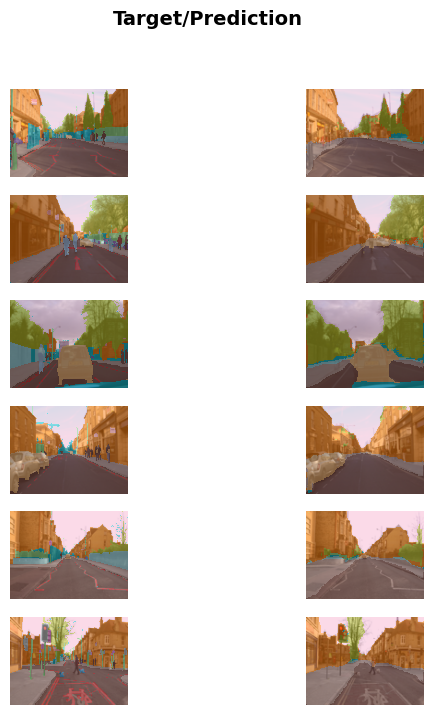

In [ ]:
# seeing the results of this model
learn.show_results(max_n=6,figsize=(7,8))

Deep learning is also used in **Natural Language Processing** (NLP). Tasks in NLP include generate text, translate automatically from one language to anther, analyse comments, etc.

In [ ]:
from fastai.text.all import *

dls=TextDataLoaders.from_folder(untar_data(URLs.IMDB),valid='test')
learn=text_classifier_learner(dls,AWD_LSTM,drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4,1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,0.466350,0.395985,0.820920,03:43


epoch,train_loss,valid_loss,accuracy,time
0,0.306836,0.245047,0.903480,07:51
1,0.253038,0.201913,0.920600,07:45
2,0.180917,0.188539,0.927760,07:54
3,0.147665,0.190878,0.928520,07:46


This model is using the IMDb Large Movie Review dataset. We can test the model with reviews of thousands of words but we check out with some short review.

In [ ]:
learn.predict('I really liked that movie!')

('pos', tensor(1), tensor([3.2812e-04, 9.9967e-01]))

Here we see that model considers the review as a positive one. The second part is the index of pos and next are the probabilities of each class (pos,neg)

Next is **building models from plain tabular data** , to train a model that'll predict whether a person is a high-income earner based on the socio economic background.

In [ ]:
from fastai.tabular.all import *
path=untar_data(URLs.ADULT_SAMPLE)

dls=TabularDataLoaders.from_csv(path/'adult.csv', path=path,
                               y_names='salary',
                               cat_names=['workclass','education','marital-status','occupation','relationship','race'],
                               cont_names=['age','fnlwgt','education-num'],
                               procs=[Categorify, FillMissing, Normalize])

learn=tabular_learner(dls,metrics=accuracy)

Here we specify the columns which are catergorical and which are continuous. Since we have no pretrained model to peform this task, we use `fit_one_cycle`, instead of `fine_tune`.

`fit_one_cycle` is the most commonly used method for training fastai models from scratch (i.e without transfer learning)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.386837,0.378146,0.823710,00:04
1,0.363114,0.366309,0.826167,00:04
2,0.358971,0.363216,0.830313,00:05


This model uses the Adult dataset whci contains some demographic data about individuals

**Recommendation systems** to predict movies people might like based on their previous viewing habits using the MovieLens dataset

In [ ]:
from fastai.collab import *
path=untar_data(URLs.ML_SAMPLE)
dls=CollabDataLoaders.from_csv(path/'ratings.csv')
learn=collab_learner(dls,y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.535684,1.441380,00:00


epoch,train_loss,valid_loss,time
0,1.374759,1.383766,00:00
1,1.268880,1.218199,00:00
2,1.037173,0.930775,00:00
3,0.801331,0.774408,00:00
4,0.658971,0.730425,00:00
5,0.648224,0.711602,00:00
6,0.628490,0.703180,00:00
7,0.610285,0.698672,00:00
8,0.603904,0.698185,00:00
9,0.614783,0.697956,00:00


This model predicts movie ratings on a scale of 0.5 to 5.0 and we specify the rangoe of the continuous number it is predicting is using the `y_range` parameter.

Though we aren't using a pretrained model, we use `fine_tune` and its best to experiment with `fine_tune` and `fit_one_cycle` to see which works best o your dataset.

At last we see the results of the model.

In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,5.0,82.0,5.0,4.211281
1,47.0,62.0,5.0,4.302196
2,94.0,72.0,3.5,3.255396
3,93.0,70.0,4.0,3.811809
4,53.0,79.0,5.0,4.206111
5,19.0,84.0,4.5,4.145430
6,47.0,51.0,4.5,4.215106
7,14.0,84.0,4.0,3.784949
8,89.0,13.0,4.0,3.412317


## Checking the docstring of any function on fastai

In [ ]:
doc(learn.predict)

In [ ]:
learn.predict??

## Jargon recap


We just covered a lot of information so let's recap briefly, <<dljargon>> provides a handy vocabulary.

```asciidoc
[[dljargon]]
.Deep learning vocabulary
[options="header"]
|=====
| Term | Meaning
|Label | The data that we're trying to predict, such as "dog" or "cat"
|Architecture | The _template_ of the model that we're trying to fit; the actual mathematical function that we're passing the input data and parameters to
|Model | The combination of the architecture with a particular set of parameters
|Parameters | The values in the model that change what task it can do, and are updated through model training
|Fit | Update the parameters of the model such that the predictions of the model using the input data match the target labels
|Train | A synonym for _fit_
|Pretrained model | A model that has already been trained, generally using a large dataset, and will be fine-tuned
|Fine-tune | Update a pretrained model for a different task
|Epoch | One complete pass through the input data
|Loss | A measure of how good the model is, chosen to drive training via SGD
|Metric | A measurement of how good the model is, using the validation set, chosen for human consumption
|Validation set | A set of data held out from training, used only for measuring how good the model is
|Training set | The data used for fitting the model; does not include any data from the validation set
|Overfitting | Training a model in such a way that it _remembers_ specific features of the input data, rather than generalizing well to data not seen during training
|CNN | Convolutional neural network; a type of neural network that works particularly well for computer vision tasks
|=====
```

With this vocabulary in hand, we are now in a position to bring together all the key concepts introduced so far. Take a moment to review those definitions and read the following summary. If you can follow the explanation, then you're well equipped to understand the discussions to come.

*Machine learning* is a discipline where we define a program not by writing it entirely ourselves, but by learning from data. *Deep learning* is a specialty within machine learning that uses *neural networks* with multiple *layers*. *Image classification* is a representative example (also known as *image recognition*). We start with *labeled data*; that is, a set of images where we have assigned a *label* to each image indicating what it represents. Our goal is to produce a program, called a *model*, which, given a new image, will make an accurate *prediction* regarding what that new image represents.

Every model starts with a choice of *architecture*, a general template for how that kind of model works internally. The process of *training* (or *fitting*) the model is the process of finding a set of *parameter values* (or *weights*) that specialize that general architecture into a model that works well for our particular kind of data. In order to define how well a model does on a single prediction, we need to define a *loss function*, which determines how we score a prediction as good or bad.

To make the training process go faster, we might start with a *pretrained model*—a model that has already been trained on someone else's data. We can then adapt it to our data by training it a bit more on our data, a process called *fine-tuning*.

When we train a model, a key concern is to ensure that our model *generalizes*—that is, that it learns general lessons from our data which also apply to new items it will encounter, so that it can make good predictions on those items. The risk is that if we train our model badly, instead of learning general lessons it effectively memorizes what it has already seen, and then it will make poor predictions about new images. Such a failure is called *overfitting*. In order to avoid this, we always divide our data into two parts, the *training set* and the *validation set*. We train the model by showing it only the training set and then we evaluate how well the model is doing by seeing how well it performs on items from the validation set. In this way, we check if the lessons the model learns from the training set are lessons that generalize to the validation set. In order for a person to assess how well the model is doing on the validation set overall, we define a *metric*. During the training process, when the model has seen every item in the training set, we call that an *epoch*.

All these concepts apply to machine learning in general. That is, they apply to all sorts of schemes for defining a model by training it with data. What makes deep learning distinctive is a particular class of architectures: the architectures based on *neural networks*. In particular, tasks like image classification rely heavily on *convolutional neural networks*, which we will discuss shortly.

## Questionnaire

It can be hard to know in pages and pages of prose what the key things are that you really need to focus on and remember. So, we've prepared a list of questions and suggested steps to complete at the end of each chapter. All the answers are in the text of the chapter, so if you're not sure about anything here, reread that part of the text and make sure you understand it. Answers to all these questions are also available on the [book's website](https://book.fast.ai). You can also visit [the forums](https://forums.fast.ai) if you get stuck to get help from other folks studying this material.

For more questions, including detailed answers and links to the video timeline, have a look at Radek Osmulski's [aiquizzes](http://aiquizzes.com/howto).

### Questions with their answers



1. Do you need these for deep learning?
>   - Lots of math F
     - Lots of data F
     - Lots of expensive computers F
     - A PhD F
   
2. Name five areas where deep learning is now the best in the world.❌
>- Computer Vision
 - NLP
 - Medicine
 - Biology
 - Image generation
 - Recommendation systems

3. What was the name of the first device that was based on the principle of the artificial neuron? ❌
>Mark 1 Perceptron built by Frank Rosenblatt

4. Based on the book of the same name, what are the requirements for parallel distributed processing (PDP)? ❌
>    - a set of *processing units*
      - a *state of activation*
      - a *pattern of connectivity* between units
      - an *output function* for each unit
      - a *propagation rule* for propagating patterns of activities across the network of connectivities
      - an *activation rule* for combining the inputs impinging on a unit with the current state of the unit to produce an output for that unit
      - a *learning rule* whereby patterns of connectivity are modified by experience.
      - an *environment* within which the system must operate.

5. What were the two theoretical misunderstandings that held back the field of neural networks?❌
>In theory, adding just an extra layer of neurons was enough in order to approximate any mathematical function with these neural networks but in practice, this made the neural network too slow and too big.
One more point to be added.(My answer referred TB)<br>In 1969, Marvin Minsky and Seymour Papert demonstrated in their book, “Perceptrons”, that a single layer of artificial neurons cannot learn simple, critical mathematical functions like XOR logic gate. While they subsequently demonstrated in the same book that additional layers can solve this problem, only the first insight was recognized, leading to the start of the first AI winter.<br><br>
In the 1980’s, models with two layers were being explored. Theoretically, it is possible to approximate any mathematical function using two layers of artificial neurons. However, in practices, these networks were too big and too slow. While it was demonstrated that adding additional layers improved performance, this insight was not acknowledged, and the second AI winter began. In this past decade, with increased data availability, and improvements in computer hardware (both in CPU performance but more importantly in GPU performance), neural networks are finally living up to its potential.<br>

6. What is a GPU?
>Graphical Processing Unit

7. Open a notebook and execute a cell containing: `1+1`. What happens?
Output as 2

8. Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen.✅

9. Complete the Jupyter Notebook online appendix.✅

10. Why is it hard to use a traditional computer program to recognize images in a photo?❌
>For us humans, it is easy to identify images in a photos, such as identifying cats vs dogs in a photo. This is because, subconsciously our brains have learned which features define a cat or a dog for example. But it is hard to define set rules for a traditional computer program to recognize a cat or a dog. Can you think of a universal rule to determine if a photo contains a cat or dog? How would you encode that as a computer program? This is very difficult because cats, dogs, or other objects, have a wide variety of shapes, textures, colors, and other features, and it is close to impossible to manually encode this in a traditional computer program<br>
Because it is very difficult to write a program to perform the same task as a neural network performs.

11. What did Samuel mean by "weight assignment"?❌
>Weights are just variables and weight assignment is a particular choice of values for those variables.
<br>It refers to current values of model parameters.

12. What term do we normally use in deep learning for what Samuel called "weights"?✅
> Parameters

13. Draw a picture that summarizes Samuel's view of a machine learning model.



14. Why is it hard to understand why a deep learning model makes a particular prediction?❌
> This is a highly-researched topic known as interpretability of deep learning models. Deep learning models are hard to understand in part due to their “deep” nature. Think of a linear regression model. Simply, we have some input variables/data that are multiplied by some weights, giving us an output. We can understand which variables are more important and which are less important based on their weights. A similar logic might apply for a small neural network with 1-3 layers. However, deep neural networks have hundreds, if not thousands, of layers. It is hard to determine which factors are important in determining the final output. The neurons in the network interact with each other, with the outputs of some neurons feeding into other neurons. Altogether, due to the complex nature of deep learning models, it is very difficult to understand why a neural network makes a given prediction.<br><br>
However, in some cases, recent research has made it easier to better understand a neural network’s prediction. For example, as shown in this chapter, we can analyze the sets of weights and determine what kind of features activate the neurons. When applying CNNs to images, we can also see which parts of the images highly activate the model. We will see how we can make our models interpretable later in the book

15. What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?❌
> Universal approximation theorem

16. What do you need in order to train a model?❌
> An architecture for the given problem.Data to input into your model. You'll need labels for your data to compare your models predictions to (for most use cases of DL)

17. How could a feedback loop impact the rollout of a predictive policing model?❌
> Positive feedback loop, where the more the model is used, the more biased data becomes making the model even more biased.
Feedback loops create problems is user settings.<br>
For example, we may want a model that would predict crimes, but we use information on arrests as a proxy . However, this data itself is slightly biased due to the biases in existing policing processes. Training with this data leads to a biased model. Law enforcement might use the model to determine where to focus police activity, increasing arrests in those areas. These additional arrests would be used in training future iterations of models, leading to an even more biased model. This cycle continues as a positive feedback loop

18. Do we always have to use 224×224-pixel images with the cat recognition model?❌
> This is the standard size but we can pass an image of any size. If you increase the size, you'll get a model with better results .

19. What is the difference between classification and regression?✅
> Classification classifies data into their respective classes whereas regression predicts a real number.

20. What is a validation set? What is a test set? (Why do we need them?❌)✅
> Validation set is used to evaluate the model during training. his ensures that the model performance is not due to “cheating” or memorization of the dataset, but rather because it learns the appropriate features to use for prediction. However, it is possible that we overfit the validation data as well. This is because the human modeler is also part of the training process, adjusting hyperparameters (see question 32 for definition) and training procedures according to the validation performance.
<br>Test set is the set used to test performance of model after its trained and evaluated on dev set. This is used for final evelaution of the model.
Dev test is used to evaluate performance of model after training and test set is used to evaluate model's performance after training and fine tuning.

21. What will fastai do if you don't provide a validation set?✅
> It'll create a dev set automatically of 20% of the dataset.

22. Can we always use a random sample for a validation set? Why or why not?✅
> No, not always.
For some tasks like time series and also on images where validation set has images not included in training, splitting randomly won't help.

23. What is overfitting? Provide an example.✅
> The model performing very well on training data and not able to generalise on test data.<br>
Example:- When we train a model for a very long time, it starts to memorise the training data instead of finding patterns in the data. Therefore it overfits the data and performs poor on test data.

24. What is a metric? How does it differ from "loss"?✅
> Metric is the function used to evaluate the performance of the model's predictions using the vaidation set in a way we humans can understand it's performance.
Whereas loss is a function used to evaluate performance of model in order to drive SGD to update the weights.

25. How can pretrained models help?✅
> Pretrained models help us use the weights that are trained on other datasets and use them on our dataset.(My answer)<br>
Pretrained models have been trained on other problems that may be quite similar to the current task. For example, pretrained image recognition models were often trained on the ImageNet dataset, which has 1000 classes focused on a lot of different types of visual objects. Pretrained models are useful because they have already learned how to handle a lot of simple features like edge and color detection. However, since the model was trained for a different task than already used, this model cannot be used as is.(solution)

26. What is the "head" of a model?✅
> The head is the last later of the neural network which is newly created as we have used a pretrained model and this head is created as per our dataset.(My answer)<br>
When using a pretrained model, the later layers of the model, which were useful for the task that the model was originally trained on, are replaced with one or more new layers with randomized weights, of an appropriate size for the dataset you are working with. These new layers are called the “head” of the model.(solution)

27. What kinds of features do the early layers of a CNN find? How about the later layers?❌
> Earlier layers learn simple features like diagonal, vertical and horizontal edges. Later layers learn more advanced features like car wheels, flower petals and even outlines of naimals.


28. Are image models only useful for photos?✅
> No, they are also useful for other tasks.(My answer)
<br>However, a lot of information can be represented as images . For example, a sound can be converted into a spectrogram, which is a visual interpretation of the audio. Time series (ex: financial data) can be converted to image by plotting on a graph. Even better, there are various transformations that generate images from time series, and have achieved good results for time series classification. There are many other examples, and by being creative, it may be possible to formulate your problem as an image classification problem, and use pretrained image models to obtain state-of-the-art results!(solution)

29. What is an "architecture"?❌
> A mathematical function or a functional form of the model is called it's architecture.
<br>It is the template or structue of the model we are trying to fit.

30. What is segmentation?✅
> Segmnetation is classifying image into different segments.(My answer)
<br>Segmentation is pixel-wise classififcation problem. We attempt to predict the label forevery simgle pixel in the image. This provides a mask for which parts of the image correspond to the given label.(solution)

31. What is `y_range` used for? When do we need it?✅
> Used for storing the rating value. To predict the rating value.(My answer)
<br>y_range is used to limit the values predicted when our problem is focused on predicting a numeric value in a given range.(solution)

32. What are "hyperparameters"?✅
> Training models requires various other parameters that define how the model is trained. For example, we need to define how long we train for, or what learning rate (how fast the model parameters are allowed to change) is used. These sorts of parameters are hyperparameters.

33. What's the best way to avoid failures when using AI in an organization?❌
> Key things to consider when using AI in an organization:
    - Make sure a training, validation and test set is defined properly in order to evaluate the model in an apt manner.
    - Try out a simple basline which future models should hopefully beat.


Result:(In the first attempt to answer the questions)
* Answered ✅ - 18
* Unanswered ❌ - 15

